In [3]:
# -*- coding: utf-8 -*-
"""
Created on Wed Dec 12 23:33:06 2018

@author: Joowhan Song
"""

import glob
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from operator import itemgetter

In [3]:
#%%

chatLogName = glob.glob('..\\data\\*.txt')

timeFmt = '%H:%M:%S.%f'

timeStamps = list()
userIDs = list()
chats = list()

maxIdxNum = 5

In [4]:
# %%
with open(chatLogName[0], 'r', encoding='utf-8') as chatLog:
    for i, line in enumerate(chatLog):
        timeStr = line[line.find('[') + 1:line.find(']')]
        time = (datetime.strptime(timeStr, timeFmt) - datetime(1900,1,1)).total_seconds()
        # time = datetime.strptime(timeStr, timeFmt)
        
        chatStr = line[line.find(']') + 2:]
        userID = chatStr[:chatStr.find(':')]
        chat = chatStr[chatStr.find(':') + 1:chatStr.find('\n')]

        timeStamps.append(time)
        userIDs.append(userID)
        chats.append(chat)

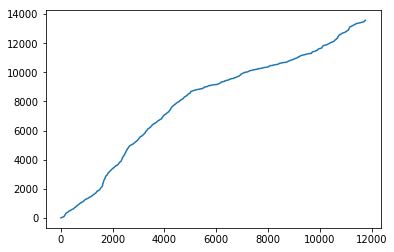

In [16]:
# %%
plt.figure()
chatNum = np.asarray(range(1, len(timeStamps) + 1))
plt.plot(timeStamps, chatNum)
plt.show()

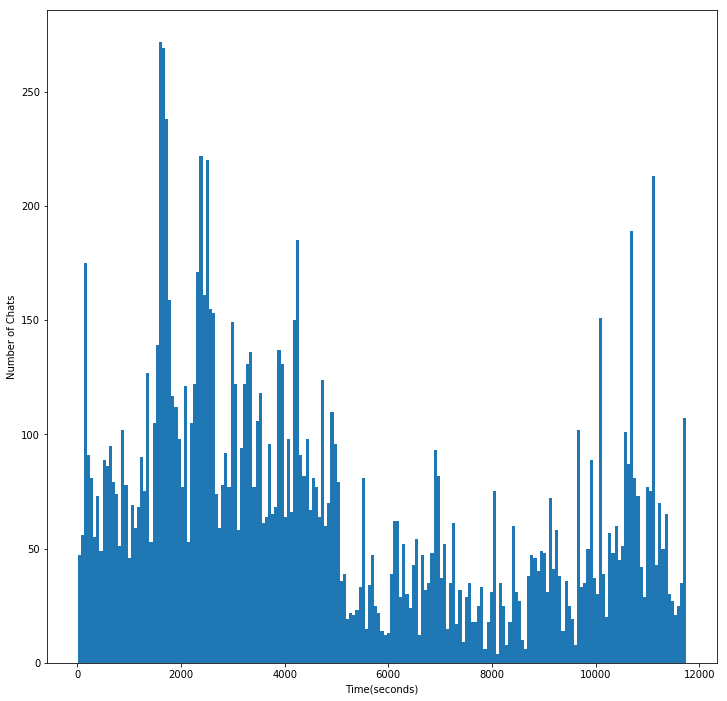

In [17]:
#%%
plt.figure(figsize=(12, 12))
chatHist = plt.hist(timeStamps, bins=np.int(timeStamps[-1] / 60))
plt.ylabel('Number of Chats')
plt.xlabel('Time(seconds)')
plt.show()

In [18]:
#%%

chatHistIndex = np.asarray(range(0, len(chatHist[0])))
chatHistSum = np.cumsum(chatHist[0])

#%%

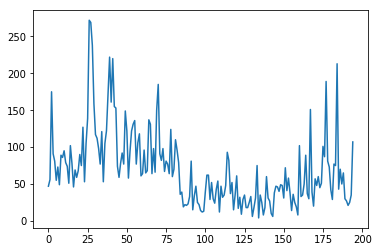

In [19]:
plt.figure()
plt.plot(chatHist[0])
plt.show()

#%%
chatTable = np.stack([chatHist[0], chatHistIndex], axis=1)

#%%
chatTableSorted = np.asarray(sorted(chatTable, key = itemgetter(0), reverse=True))

#%%

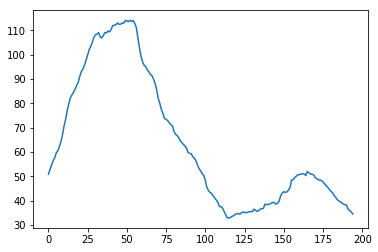

Moving Average Length:195	 Original Length:195


In [92]:
averageLength = 60

plt.figure()
chatHistConv = np.convolve(chatHist[0], np.ones((averageLength,))/averageLength, mode='same')
# print(chatHistConv[-10:-1])
# chatHistMean = np.concatenate([chatHistConv, chatHist[0][-10:-1]])
chatHistMean = chatHistConv
plt.plot(chatHistMean)
plt.show()
print('Moving Average Length:{}\t Original Length:{}'.format(len(chatHistMean), len(chatHist[0])))

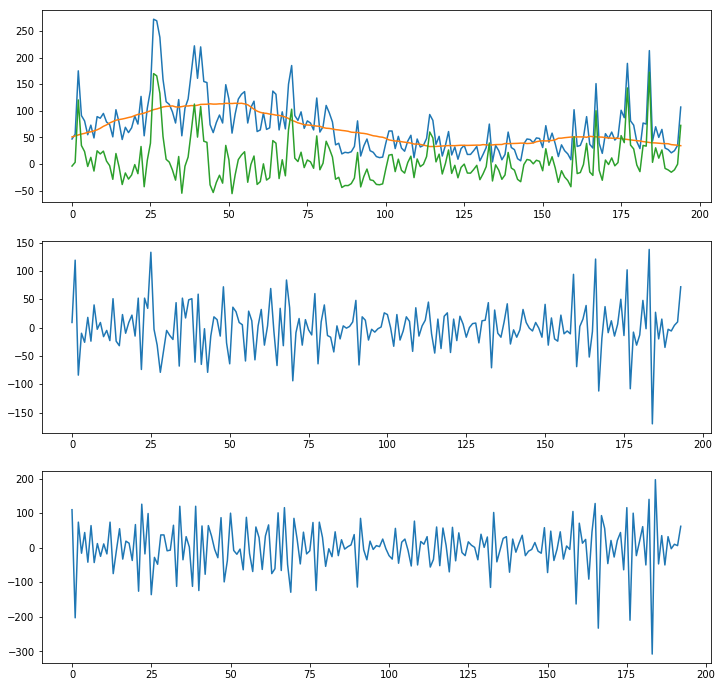

In [119]:
plt.figure(figsize = (12, 12))
plt.subplot(3, 1, 1)
plt.plot(chatHist[0])
plt.plot(chatHistMean)
chatHistDiff = chatHist[0] - chatHistMean
plt.plot(chatHist[0] - chatHistMean)
plt.subplot(3, 1, 2)
plt.plot(np.diff(chatHist[0]))
plt.subplot(3, 1, 3)
plt.plot(np.diff(np.diff(chatHist[0])))
plt.show()

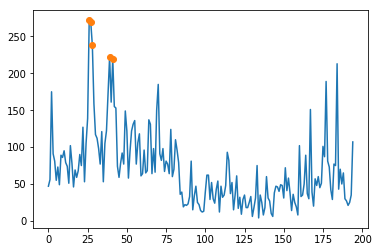

In [117]:
maxIdx = list()

for i in range(0, maxIdxNum):
    maxIdx.append(int(chatTableSorted[i, 1]))

maxIdx = np.asarray(maxIdx) 
#%%

plt.figure()
plt.plot(chatHist[0])
plt.plot(maxIdx, chatHist[0][maxIdx], 'o', markersize = 6)
plt.show()


underBound = list()
upperBound = list()

for i in range(0, maxIdxNum):
    underBound.append(chatHist[1][maxIdx[i]])
    upperBound.append(chatHist[1][maxIdx[i] + 1])


    
#%%
hotChats = list()

for i in range(0, maxIdxNum):
    booleanIdx = np.array((timeStamps > underBound[i]) & (timeStamps < upperBound[i]))
    hotChat = np.asarray(chats)[booleanIdx]
    hotChats.append(hotChat)
    
#%%

In [118]:
hotChats[3]

array([' 조졌네', ' 거른다', ' 조졌다', ' mar del japan 이네', ' 엌', ' ㅁㅊ이건...아..',
       ' ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ', ' ogn에 얼렁 연락해야겠네 ㅋㅋ', ' 거른다', ' 해',
       ' 오늘부터 포나 거릅니다', ' 거름 ㅅㄱ', ' 포나 안래', ' 거른다', ' 조졌다', ' 아이돌 출신ㅋㅋㅋ',
       ' ㅈ트나이트...', ' 명', ' 믿고 거릅니다 ㅅㄱ영', ' ogn에 연락해여 빨리', ' ogn 망했네',
       ' ㅈᆢ졌다', ' 거름 ㅅㄱ', ' 헐', ' ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ', ' 진짜 죠졌다', ' ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ',
       ' 포나 거른다', ' 해', ' 스페인어인듯??', ' 연락해야겠는데 ㅋㅋㅋㅋㅋㅋㅋㅋ', ' 관계자분한테 연락하죠',
       ' 저걸 캐치 하시다니 ㅋㅋ', ' ㅈ트나이트', ' 해', ' 포나안함 ㅅㄱ', ' 포너 거른답',
       ' 저건 조금 민감한데 ;', ' 믿고 거르내요 수고연', ' ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ', ' 포나거름',
       ' 뭐야 갑자기 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ', ' ogn조졌다 진자', ' 연락하는게 좋을것같음',
       ' 저거 수정해야하는데 안그럼 난리남 ㅋㅋㅋㅋㅋ', ' 망.....', ' 빨리 말해줘야할텐데', ' ㄹㅇ',
       ' ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ', ' 명', ' 갑분싸', ' ogn에 연락하자 얼른',
       ' 저걸 발견하신분은 뭐지', ' ㅇㄱ ㄹㅇ', ' ㄷㄷ', ' ㅋㅋㅋㅋㅋㅋㅋㅋㅋ', ' 이거 맞음',
       ' ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ', ' 포나 ogn 거른다', ' 포나 거른다', ' 예매취소함ㅅㄱ',
       ' ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅠㅠㅠ', ' 이게 걸려지네', ' ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ',
       ' 일본해 쌉에반데 ;;', ' 저거 되게 민감한 사안인데', ' ㅈ트나이트'

In [7]:
from PIL import Image

In [4]:
import pylab
import imageio
filename = glob.glob('../data/*.mp4')
vid = imageio.get_reader(filename[0],  'ffmpeg')


In [5]:
import numpy as np
import cv2

# If the input is taken from the camera, pass 0 instead of the video file name.
 
cap = cv2.VideoCapture(filename[0])
 
# Check if camera opened successfully
if (cap.isOpened()== False): 
    print("Error opening video stream or file")

# Read until video is completed
while(cap.isOpened()):
    # Capture frame-by-frame
    ret, frame = cap.read()
    if ret == True:

        # Display the resulting frame
        cv2.imshow('Frame',frame)

        # Press Q on keyboard to  exit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break

    # Break the loop
    else: 
        break

#When everything done, release the video capture object
cap.release()
 
# Closes all the frames
cv2.destroyAllWindows()

# Define the codec and create VideoWriter object.The output is stored in 'outpy.avi' file.
# Define the fps to be equal to 10. Also frame size is passed.
 
# out = cv2.VideoWriter('outpy.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))

NameError: name 'frame_width' is not defined

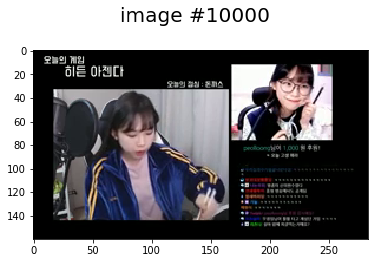

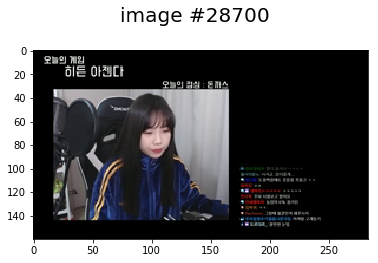

In [10]:
nums = [10000, 28700]
for num in nums:
    image = vid.get_data(num)
    fig = pylab.figure()
    fig.suptitle('image #{}'.format(num), fontsize=20)
    pylab.imshow(image)
pylab.show()

In [121]:
filename

['../data\\20181211_347550379_Just Chatting.mp4',
 '../data\\20181211_347550379_Just Chatting_1280_720.mp4']